In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
read_file = pd.read_csv (r'taskdata.txt')
read_file.to_csv (r'task.csv', index=None)

In [15]:
df=pd.read_csv('task.csv')
df.head(5)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538461,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
user_id                  4407 non-null int64
account_id               4400 non-null float64
max_return_days          4407 non-null int64
average_return_days      4407 non-null float64
customer_since_months    4407 non-null int64
total_revenue            4407 non-null float64
average_revenue          4407 non-null float64
avg_vas_count            4407 non-null float64
avg_used_vas_value       4407 non-null float64
business_type            4407 non-null int64
avg_wallet_bonus         4407 non-null float64
avg_active_ads           4407 non-null float64
avg_new_ads              4407 non-null float64
avg_email_replies        4407 non-null float64
avg_call_replies         4407 non-null float64
avg_sms_replies          4407 non-null float64
target                   4407 non-null int64
dtypes: float64(12), int64(5)
memory usage: 585.4 KB


In [17]:
df.shape

(4407, 17)

# DATA ANALYSIS

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


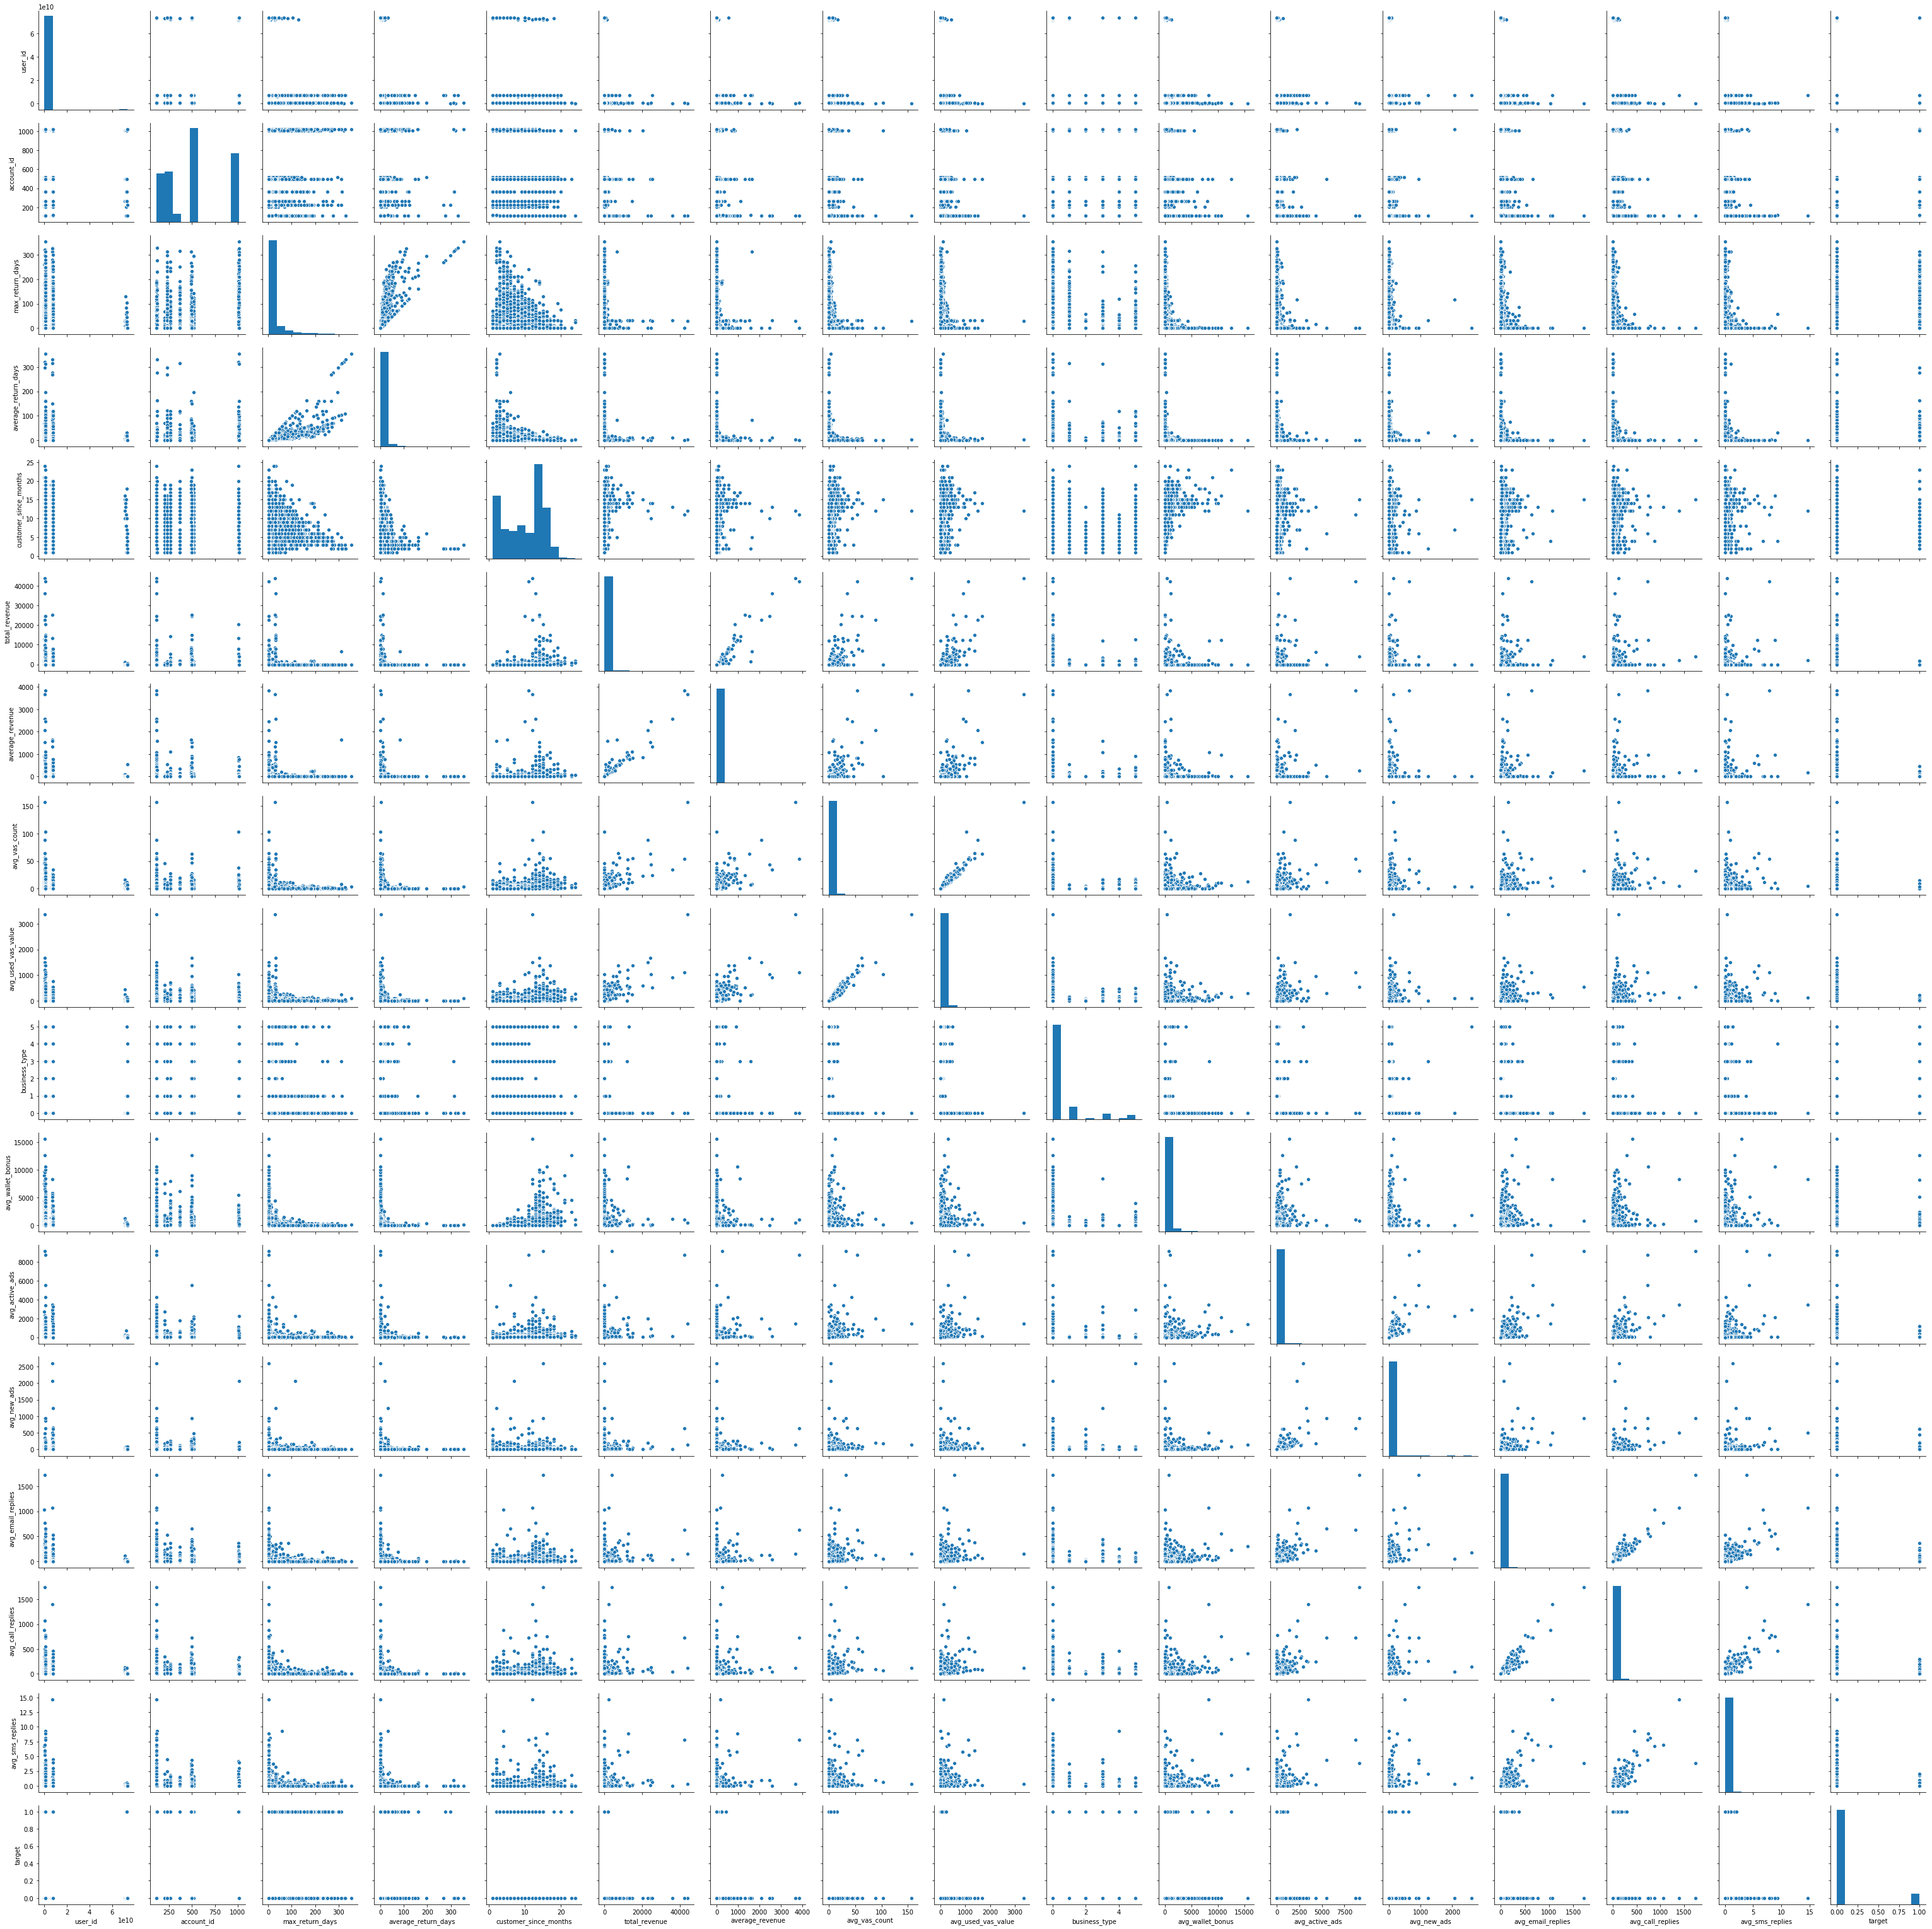

In [36]:
sns.pairplot(df)

<Figure size 720x720 with 0 Axes>

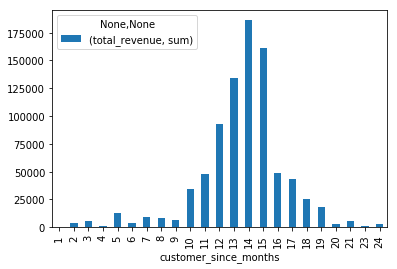

In [66]:
plt.figure(figsize=(10,10))
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers
df.groupby('customer_since_months')[['total_revenue']].agg(['sum']).plot(kind='bar')


- FROM THE ABOVE GRAPH WECAN SEE THAT 14th MONTH HAS HIGHEST REVENUE

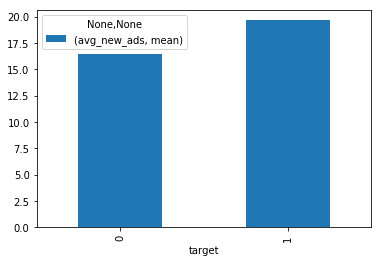

In [70]:
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

df.groupby('target')[['avg_new_ads']].agg(['mean']).plot(kind='bar')

<Figure size 720x720 with 0 Axes>

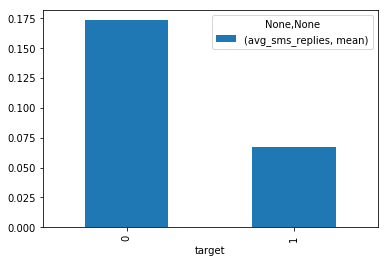

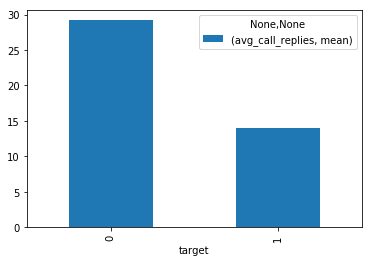

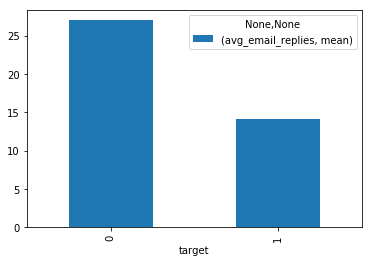

In [95]:
fig=plt.figure(figsize=(10,10))
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

df.groupby('target')[['avg_sms_replies']].agg(['mean']).plot(kind='bar')

df.groupby('target')[['avg_call_replies']].agg(['mean']).plot(kind='bar')

df.groupby('target')[['avg_email_replies']].agg(['mean']).plot(kind='bar')

- FROM THE ABOVE GRAPH WE CAN SAY THAT THERE IS  MUCH IMPACT OF CUSTOMERS DUE TO MAILS,CALLS,SMS

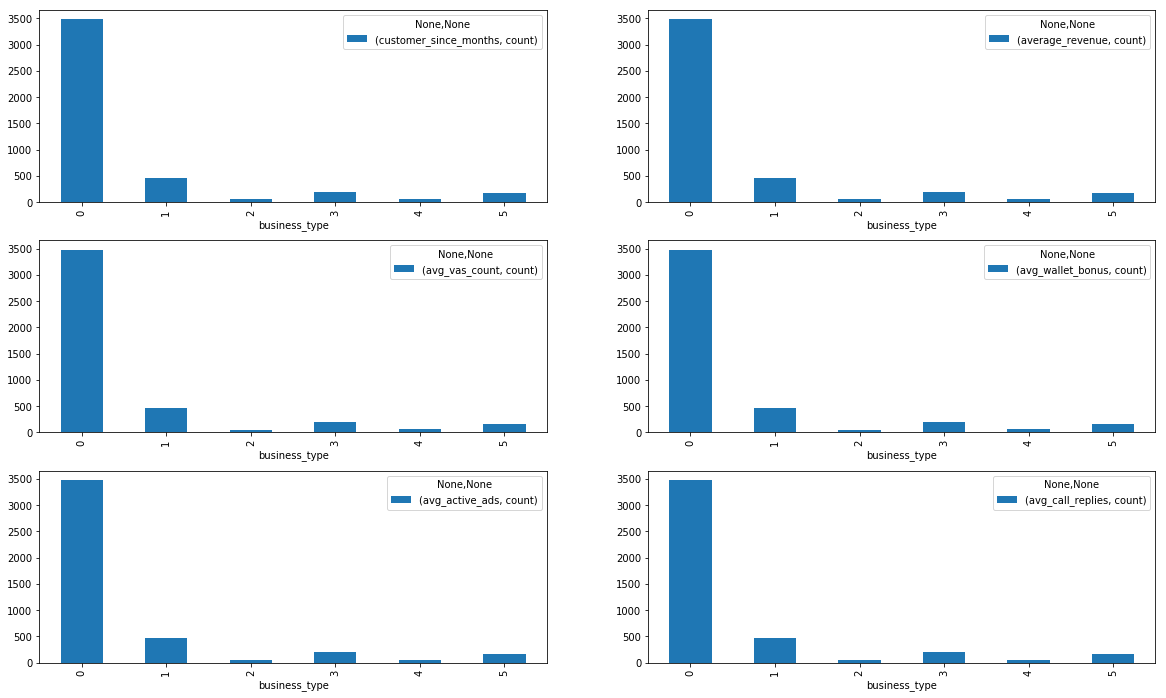

In [113]:
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers
fig,a=plt.subplots(3, 2, figsize=(20, 12))
df.groupby('business_type')[['customer_since_months']].agg(['count']).plot(kind='bar',ax=a[0][0])
df.groupby('business_type')[['average_revenue']].agg(['count']).plot(kind='bar',ax=a[0][1])
df.groupby('business_type')[['avg_vas_count']].agg(['count']).plot(kind='bar',ax=a[1][0])
df.groupby('business_type')[['avg_wallet_bonus']].agg(['count']).plot(kind='bar',ax=a[1][1])
df.groupby('business_type')[['avg_active_ads']].agg(['count']).plot(kind='bar',ax=a[2][0])
df.groupby('business_type')[['avg_call_replies']].agg(['count']).plot(kind='bar',ax=a[2][1])

- FROM THE ABOVE GRAPHS WE CAN SAY THAT THE BUSSINESS TYPE 0 HAS HIGH REVENUE,WHERE NUMBER OF CUSTOMER IN MONTHS MORE IN BUSSINESS 0,WHERE INCREASE OF THIS REVENUE AND CUSTOMERS IN BUSSINESS TYPE 0 DUE TO MORE NUMBER OF CALL REPLIES,MORE ACTIVE ADS,MORE MAIL,MORE SMSS

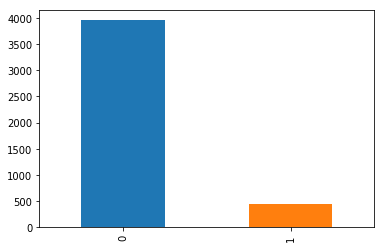

In [114]:
df.target.value_counts().plot(kind='bar')

- WHERE THE DATA IS IMBALANCED
- WHERE ONLY FEW PEOPLE ARE STOPPED TO REPURCHASE
- 1- CHURN
- 0- CONTINUE

# Feature engineering and Feature selection

In [117]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538461,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


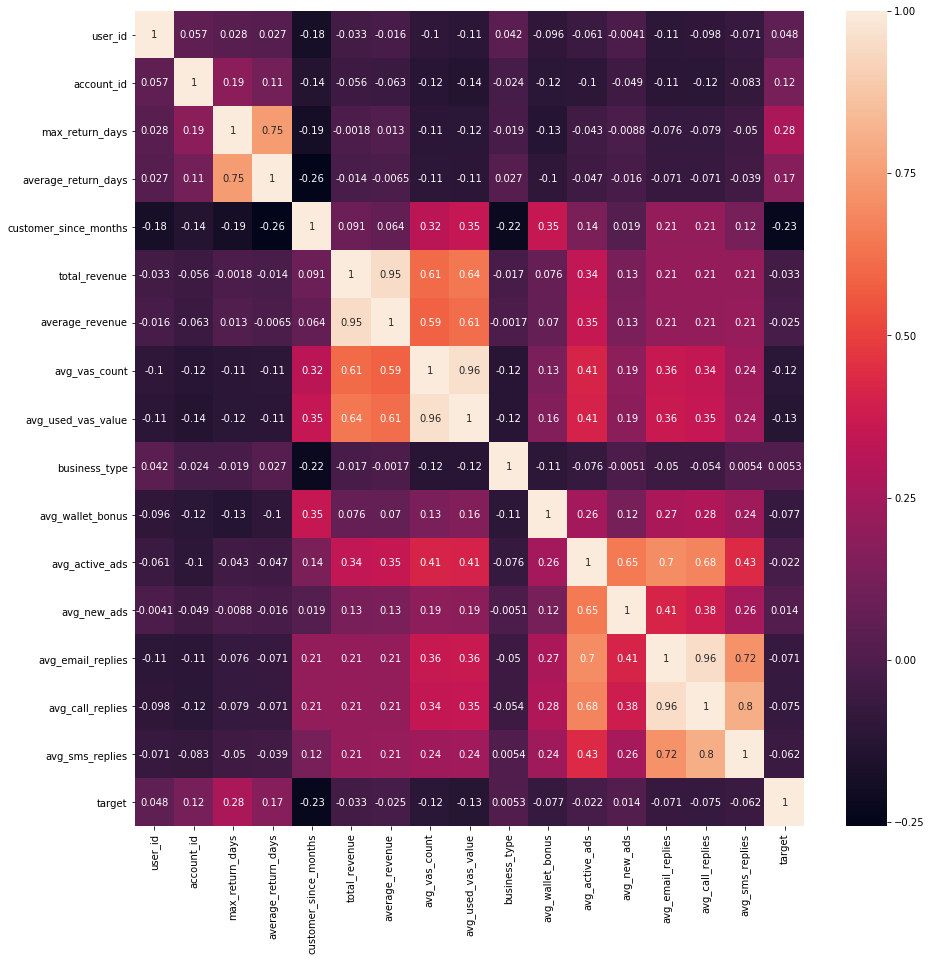

In [121]:
#Finding the corelation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [122]:
df1=df.corr()


In [131]:
corr_feat=[]
for i in range(len(df1 .columns)):
    for j in range(i):
        if abs(df1.iloc[i, j]) > 0.8:
            colname = df1.columns[i]
            corr_feat.append(colname)

In [129]:
#The which are correlated more than 0.8
corr_feat

['average_revenue', 'avg_used_vas_value', 'avg_call_replies']

In [126]:
df.drop(['average_revenue', 'avg_used_vas_value', 'avg_call_replies'],axis=1,inplace=True)

In [127]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,avg_vas_count,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,3.666667,0,300.0,79.333333,15.250000,32.416667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,4.900000,0,0.0,232.100000,18.300000,16.200000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,5.333333,0,150.0,55.083333,3.750000,20.250000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,6.307692,0,1481.0,409.538461,80.769231,87.461538,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,5.846154,0,41.5,48.230769,1.692308,17.461538,0.230769,0


- from the data set and data visulistion we can say thet avg_sms_replies and avg_call_replies gives same information to customers in different ways so we can combine the both columns and create one column
    
 

In [133]:
df['information']=df['avg_email_replies']+df['avg_sms_replies']

In [134]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,avg_vas_count,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_sms_replies,target,information
0,410039,496.0,8,1.500000,14,0.0,3.666667,0,300.0,79.333333,15.250000,32.416667,0.250000,0,32.666667
1,410240,499.0,37,8.200000,10,0.0,4.900000,0,0.0,232.100000,18.300000,16.200000,0.000000,0,16.200000
2,411764,493.0,9,1.533333,15,0.0,5.333333,0,150.0,55.083333,3.750000,20.250000,0.000000,0,20.250000
3,411985,262.0,1,1.000000,14,0.0,6.307692,0,1481.0,409.538461,80.769231,87.461538,0.000000,1,87.461538
4,412071,496.0,1,1.000000,18,0.0,5.846154,0,41.5,48.230769,1.692308,17.461538,0.230769,0,17.692308


- user id and account id doesn't make impact on where the person is going to leave or not.so, we can drop the two columns

In [136]:
df.drop(['user_id','account_id','avg_email_replies','avg_sms_replies'],axis=1,inplace=True)


In [151]:
df=df.astype('int')

In [152]:
df.dtypes

max_return_days          int32
average_return_days      int32
customer_since_months    int32
total_revenue            int32
avg_vas_count            int32
business_type            int32
avg_wallet_bonus         int32
avg_active_ads           int32
avg_new_ads              int32
target                   int32
information              int32
dtype: object

In [153]:
y=df.iloc[:,-2]
x=df.drop('target',axis=1)

In [154]:
from sklearn.model_selection import train_test_split

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3525, 10), (882, 10), (3525,), (882,))

### Applying random forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
model=RandomForestClassifier()

In [164]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
y_pred=model.predict(x_test)

In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix,cohen_kappa_score,roc_auc_score,log_loss

In [167]:
accuracy_score(y_pred,y_test)

0.8843537414965986

In [174]:
log_loss(y_test,y_pred)

3.99429386195277

### Applying pca for feature selection

In [196]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [197]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [289]:
mdl=PCA(n_components=6)
x_pca=mdl.fit_transform(x_train)
xt_pca=mdl.transform(x_test)

### Applying gradient boosting

In [290]:
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
model2=GradientBoostingClassifier()
model2.fit(x_pca,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [292]:
y_predd=model2.predict(xt_pca)

In [293]:
accuracy_score(y_test,y_predd)

0.8956916099773242

In [294]:
import shap
shap.initjs()

In [277]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(x_pca)

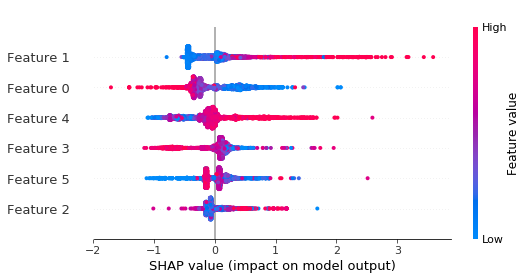

In [278]:
shap.summary_plot(shap_values, x_pca)

- where feature 1 is important feature for model building and where feature 2 has less importance

### where data is imbalance,we are balancing the data

In [348]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.5)
x_train_res, y_train_res = os.fit_sample(x, y)
x_train_res.shape,y_train_res.shape

((5928, 10), (5928,))

In [350]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train_res,y_train_res,train_size=0.7)

In [351]:
model2.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [353]:
y_p=model2.predict(X_test)

In [354]:
accuracy_score(Y_test,y_p)

0.8414839797639123

In [355]:
cohen_kappa_score(Y_test,y_p)

0.6311668489960123